# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. **You as a data scientist have to analyze the data provided and, with the help of a classification model:**

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from sklearn.tree import DecisionTreeClassifier
# !pip install xgboost 
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier


# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [3]:
visa = pd.read_csv("HR_Employee_Attrition-1.csv")  # read the data

In [4]:
# copy data to another variable to avoid any changes to original data
df = visa.copy()

In [5]:
# view top 5 rows of the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# view last 5 rows of the data
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
# check the size of the data
df.shape

(25480, 12)

In [8]:
# check the types of the coulumns for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# check for duplicate values
df.duplicated().sum()

0

In [10]:
# check for missing values
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observation
* The dataset has 25,480 rows and 12 columns.
* There are 3 numerical varialbes- no_of_employees, yr_of_estab and prevailing_wage, and 9 categorical variables- 'case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage','full_time_position', 'case_status'.
* There are no duplicated values.
* There are no missing values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [11]:
# the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observation
* The number of employees in the employer's company ranges from -26 to 60,2069. We need to fix it since it's not reasonable to have a negative number.
* The average number of employees is 5,667. 
* The year of the company was established ranges from 1800 to 2016. 

* The prevailing wages range from 2.13 to 319,210.27. This significant difference could cause by the different units in this variable.

In [12]:
# check negative values in the employee column
df[df["no_of_employees"] < 0].shape

(33, 12)

In [13]:
# convert the values to a positive number
df["no_of_employees"] = abs(df["no_of_employees"])
df[df["no_of_employees"] < 0].shape

(0, 12)

In [14]:
# print the number of count for all catagorical variables
cat_col = list(df.select_dtypes("object").columns)

for i in cat_col:
    print(df[i].value_counts())
    print("-" * 45)

EZYV20237    1
EZYV24479    1
EZYV12228    1
EZYV4332     1
EZYV8888     1
            ..
EZYV5952     1
EZYV338      1
EZYV8513     1
EZYV9582     1
EZYV4115     1
Name: case_id, Length: 25480, dtype: int64
---------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
---------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
---------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
---------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
---------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------

In [15]:
# check the number of unique values
df["case_id"].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [16]:
# drop 'case_id' column from the data with inplace=True
df.drop("case_id", axis=1, inplace=True)

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="-"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="blue", linestyle="--"
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].mode()[0], color="green", linestyle="--", linewidth=1
    )  # Add mode to the histogram

**no_of_employees**

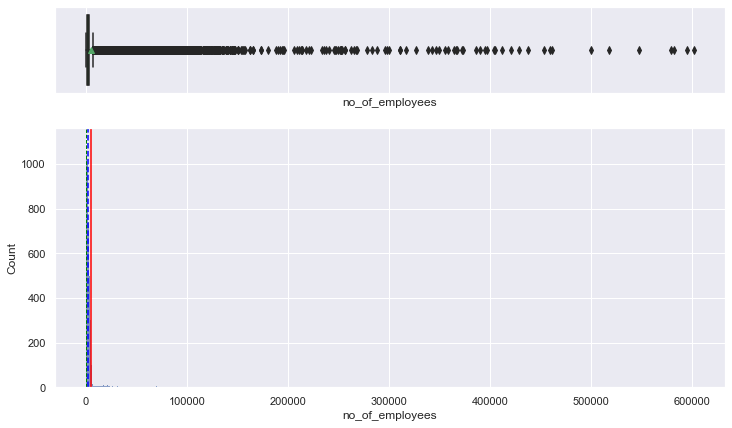

In [18]:
# plot histogram_boxplot for no_of_employees
histogram_boxplot(df, "no_of_employees")

* The number of employees ranges from 11 to 60,209.
* The average number of employees is 5,667, and the median is 2,109.
* There are outliers in the data.

**yr_of_estab**

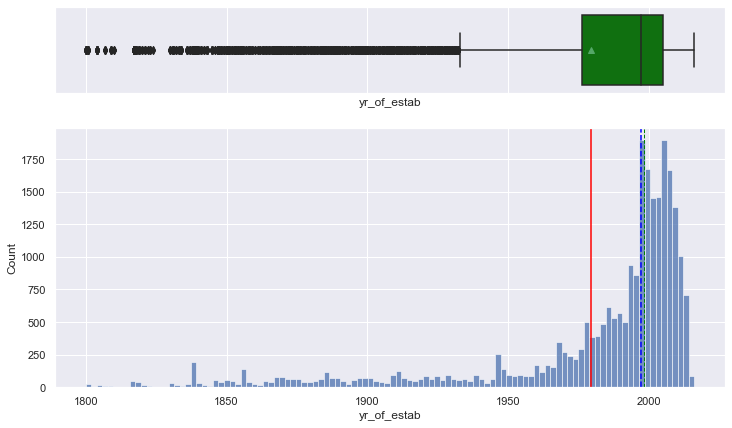

In [19]:
# plot histogram_boxplot for yr_of_estab
histogram_boxplot(df, "yr_of_estab")

In [20]:
df.yr_of_estab.describe()

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

* The year of the employer's company built ranges from 1800 to 2016. 
* The average year the company built is 1979. The median year is 1997.
* There are outliers in the data.

**prevailing_wage**

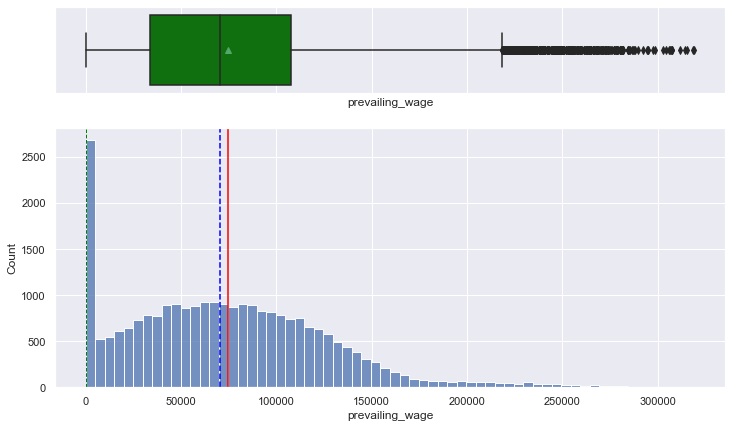

In [25]:
# plot histogram_boxplot for prevailing_wage
histogram_boxplot(df, "prevailing_wage")

In [265]:
df.prevailing_wage.describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

* The prevailing wage ranges from 2.14 to 319,210. The considerable gap could be caused by the wage valued as hourly, monthly, or yearly. We should be cautious when using the variable. 
* The average prevailing wage is 74,455. The median wage is 70,308.
* There are outliers in the data.

In [266]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**continent**

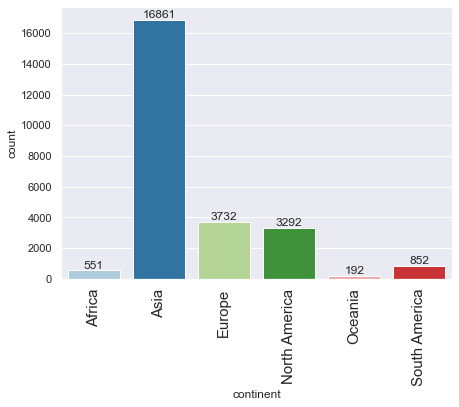

In [267]:
# create labeled_barplot for continent
labeled_barplot(df, "continent")

* The most of the employees come from Aisa and the least of the employees comes from Oceania.

**education_of_employee**

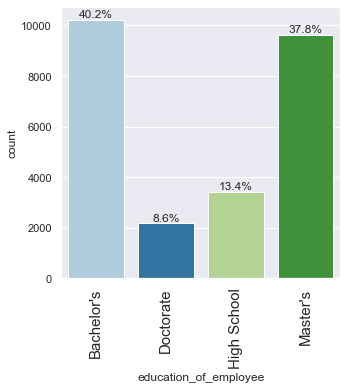

In [380]:
# create labeled_barplot for education_of_employee
labeled_barplot(df, "education_of_employee", perc=True)

* 40.2% of applicants have a Bachelor's degree, followed by 37.8% of them have a Master's degree.

**has_job_experience**

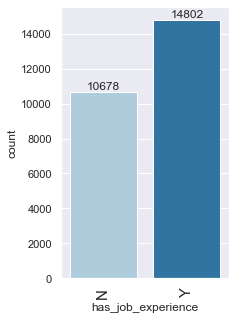

In [269]:
# create labeled_barplot for has_job_experience
labeled_barplot(df, "has_job_experience")

* 14,802 employees of the data have job experiences, and 10,678 employees don't have any job experiences. More than half of the applicants have job experience.

**requires_job_training**

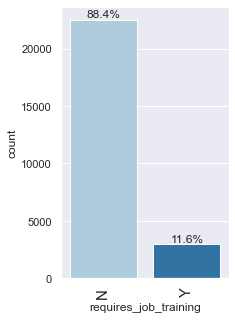

In [270]:
# create labeled_barplot for requires_job_training
labeled_barplot(df, "requires_job_training", perc=True)

* 88.4% of the employees require job training, and 11.6% don't.

**region_of_employment**

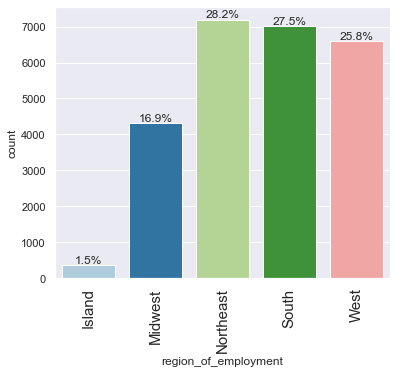

In [271]:
# create labeled_barplot for region_of_employment
labeled_barplot(df, "region_of_employment", perc=True)

* The top three employment regions are in the northeast, south, and west of the United States.

**unit_of_wage**

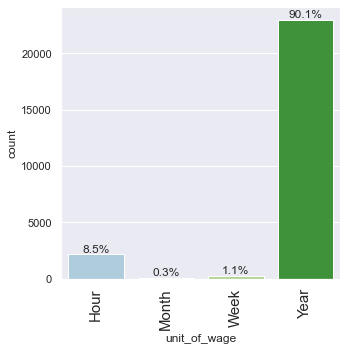

In [272]:
# create labeled_barplot for unit_of_wage
labeled_barplot(df, "unit_of_wage", perc=True)

* 90.1% of the employee got jobs valued yearly and 0.3% valued monthly.

**full_time_position**

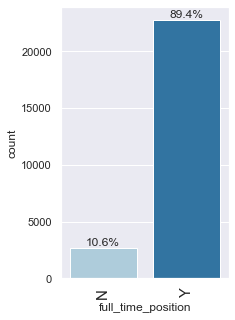

In [273]:
# create labeled_barplot for full_time_position
labeled_barplot(df, "full_time_position", perc=True)

* 89.4% of the employees are full-time jobs, and 10.6% are not. 

**case_status**

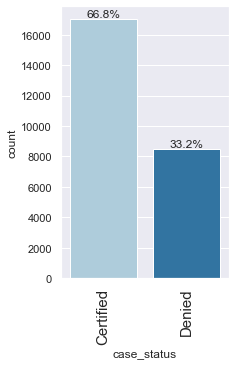

In [274]:
# create labeled_barplot for case_status
labeled_barplot(df, "case_status", perc=True)

* 66.8% of the employees is certified and 33.2% of them is denied.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Bivariate Analysis

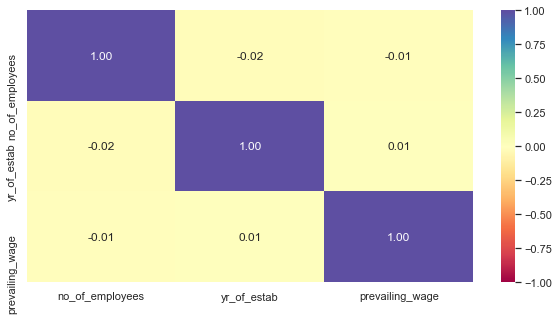

In [275]:
# the correlation between the variables
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [276]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [277]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

**education_of_employee vs. case_status**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


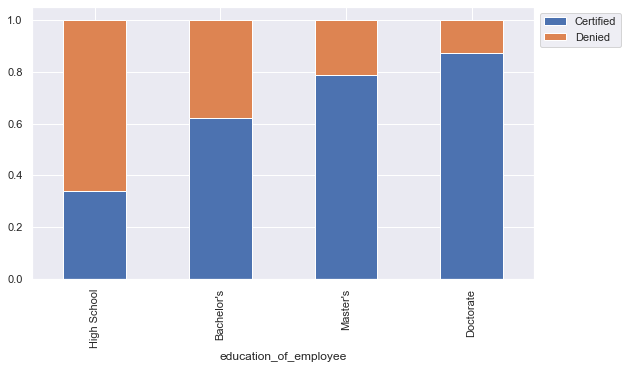

In [278]:
stacked_barplot(
    df, "education_of_employee", "case_status"
)  # plot stacked barplot for education_of_employee and case status

* The higher the education of the employees, the higher percentage of certification visas.
* High school degree gets the highest percentage of the denied visa, and a doctorate gets the lowest.

**education_of_employee vs. region_of_employment**

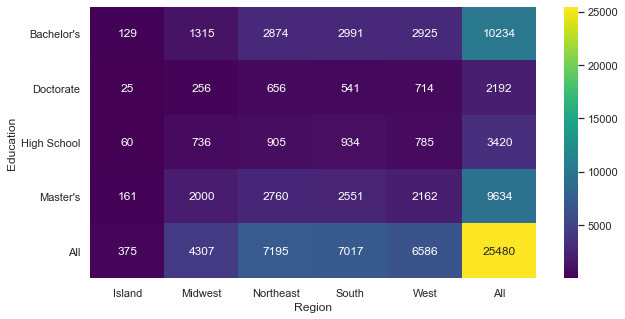

In [279]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(df.education_of_employee, df.region_of_employment, margins=True),
    annot=True,
    fmt="g",
    cmap="viridis",
)  # plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* Master's and Bachelor's degrees are the top 2 educational backgrounds across different regions. 
* High school degree is more than a doctorate across all regions.

**region_of_employment vs. case_status: the percentage of visa certifications across each region**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


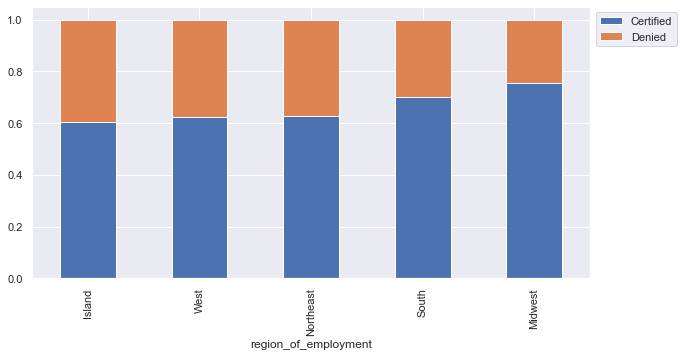

In [280]:
stacked_barplot(
    df, "region_of_employment", "case_status"
)  # plot stacked barplot for region_of_employment and case status

* Island, West, and Northeast are the top 3 percentage of denied visas, followed by South and Midwest. Midwest is the lowest percentage of denied visas.

**How does the visa status vary across different continents?**

**continents vs. case_status**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


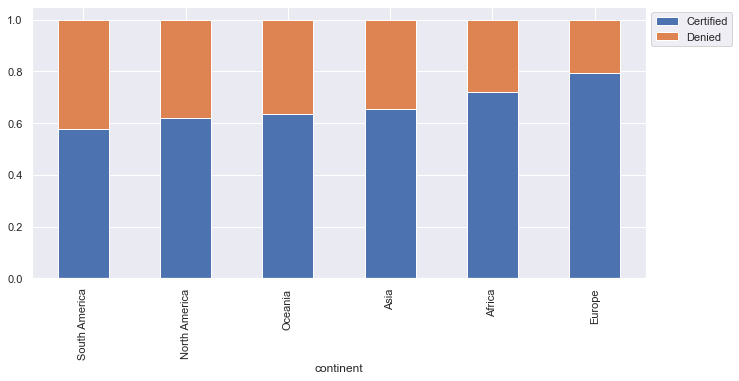

In [281]:
stacked_barplot(
    df, "continent", "case_status"
)  # plot stacked barplot for continent and case status

* South America gets the highest percentage of denied visas, followed by North America.

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

**has_job_experience vs. case_status**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


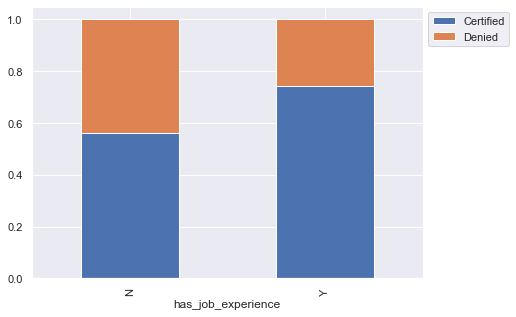

In [282]:
stacked_barplot(
    df, "has_job_experience", "case_status"
)  # plot stacked barplot for has_job_experience and case status

* The employees with job experience have more than 70% of certification visas. And The employees without any job experience have more than a 50% of certification visas.

**has_job_experience vs. requires_job_training**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


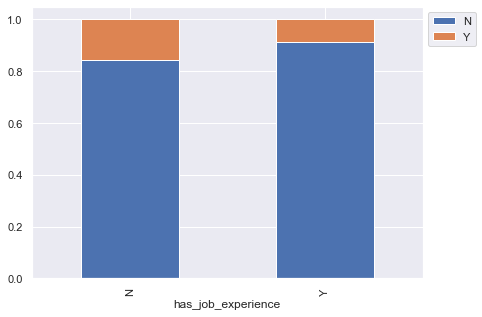

In [283]:
stacked_barplot(
    df, "has_job_experience", "requires_job_training"
)  # plot stacked barplot for job experience and requires_job_training

* The employees with job experience have less percentage of requiring job training than those without any job experience.

**In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

**unit_of_wage vs. case_status- The prevailing wage has different units (Hourly, Weekly, etc).** 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


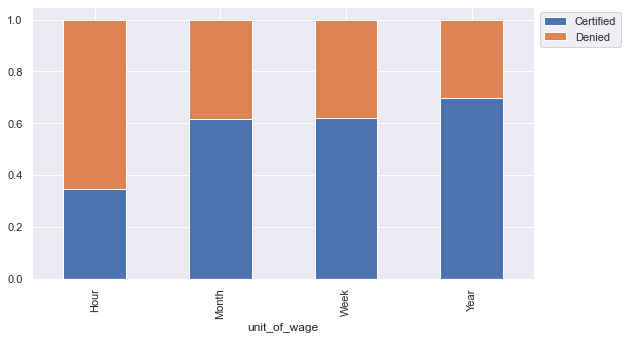

In [284]:
stacked_barplot(
    df, "unit_of_wage", "case_status"
)  # plot stacked barplot for unit_of_wage and case status

* Yearly pay unit is around 70% to be certified visa, followed by Weekly and Monthly, approximately 62%. The hourly pay unit is most likely to be denied.

**The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

**prevailing_wage vs. case_status**

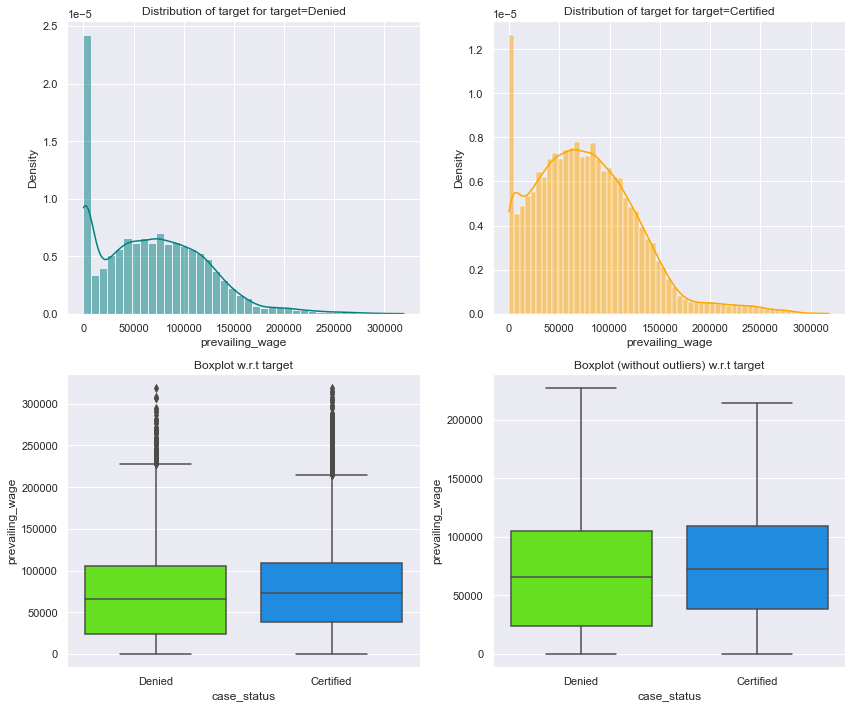

In [285]:
distribution_plot_wrt_target(
    df, "prevailing_wage", "case_status"
)  # plot stacked barplot for prevailing_wage and case status

* The certified workers have higher prevailing wages compared to denied workers.

**prevailing_wage vs. region_of_employment**

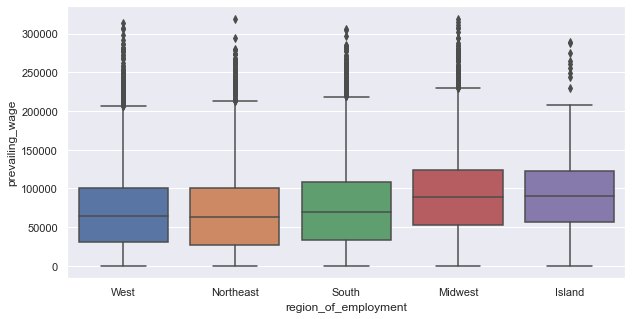

In [286]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="region_of_employment", y="prevailing_wage"
)  # create boxplot for region of employment and prevailing wage
plt.show()

* The prevailing wages are higher in Midwest and Island. The Northeast region has the lowest.

### Outlier Check

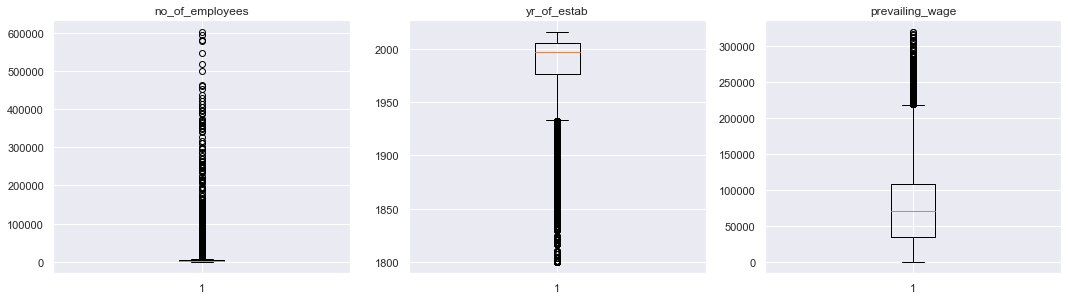

In [287]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)  # create boxplots for all the numeric columns
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [288]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = df.drop(["case_status"], axis=1)  # drop case status from the data
y = df["case_status"]

X = pd.get_dummies(X, drop_first=True)  # create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y
)  # split the data into train and test in the ratio 70:30

In [289]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (19110, 21)
Shape of test set :  (6370, 21)
Percentage of classes in training set:
1    0.66787
0    0.33213
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


## EDA

In [376]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   yr_of_estab                        25480 non-null  int64  
 2   prevailing_wage                    25480 non-null  float64
 3   continent_Asia                     25480 non-null  uint8  
 4   continent_Europe                   25480 non-null  uint8  
 5   continent_North America            25480 non-null  uint8  
 6   continent_Oceania                  25480 non-null  uint8  
 7   continent_South America            25480 non-null  uint8  
 8   education_of_employee_Doctorate    25480 non-null  uint8  
 9   education_of_employee_High School  25480 non-null  uint8  
 10  education_of_employee_Master's     25480 non-null  uint8  
 11  has_job_experience_Y               25480 non-null  uin

**no_of_employees**

In [386]:
df.no_of_employees.describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

* There are no negative numbers.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while `US citizens will miss the opportunity to work on that position.`

* If a visa is denied when it had to be certified `the U.S. will lose a suitable human resource that can contribute to the economy.` 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.
F1 - RP
Three scale weight

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [290]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [291]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [292]:
# Decision Tree Model
model = DecisionTreeClassifier(
    random_state=1
)  # define decision tree classifier with random state = 1
model.fit(X_train, y_train)  # fit decision tree classifier on the train data

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

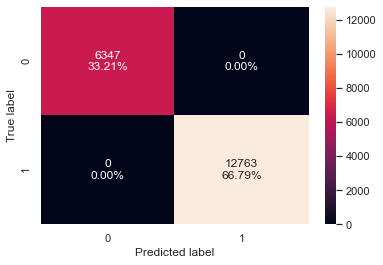

In [293]:
confusion_matrix_sklearn(
    model, X_train, y_train
)  # create confusion matrix for train data

In [294]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)  # check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

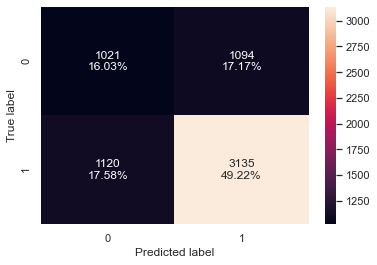

In [295]:
confusion_matrix_sklearn(model, X_test, y_test)  # create confusion matrix for test data

In [296]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) # check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.652433,0.73678,0.74131,0.739038


* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [297]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=5, n_jobs=-1) # run grid search with n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

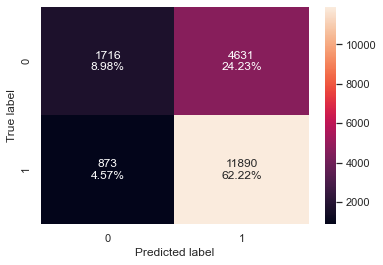

In [298]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [299]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


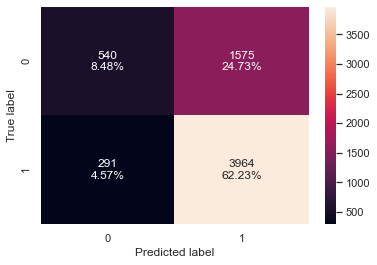

In [300]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [301]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) # check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.707064,0.93161,0.715653,0.809475


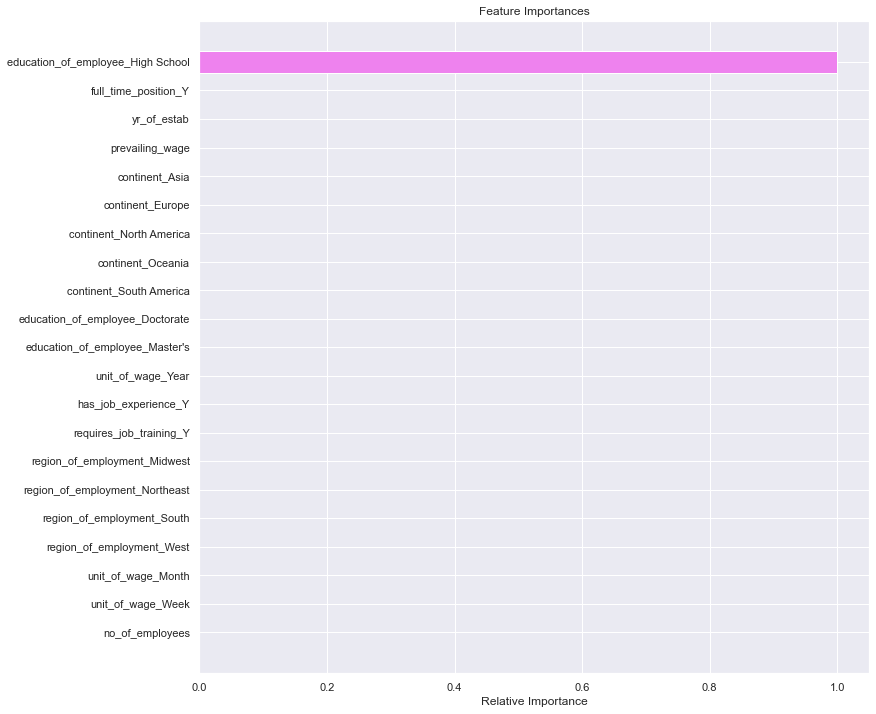

In [368]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
* The overfitting has been reduced after tuning.
* The model is good at identifying certified workers but bad at denied workers.
* High school education is the most important for tuned decision tree.
* Let's try some other models.

## Building bagging and boosting models

### Bagging Classifier

In [302]:
bagging_classifier = BaggingClassifier(
    random_state=1
)  # define bagging classifier with random state = 1
bagging_classifier.fit(X_train, y_train)  # fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Checking model performance on training set

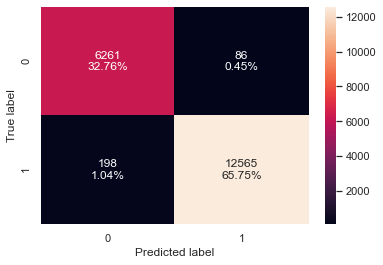

In [303]:
confusion_matrix_sklearn(
    bagging_classifier, X_train, y_train
)  # create confusion matrix for train data

In [304]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)  # check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985139,0.984486,0.993202,0.988825


#### Checking model performance on test set

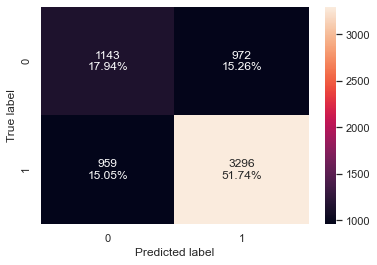

In [305]:
confusion_matrix_sklearn(
    bagging_classifier, X_test, y_test
)  # create confusion matrix for test data

In [306]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.69686,0.774618,0.772259,0.773437


### Random Forest

In [307]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1) # define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train,y_train) # fit random forest on the train data

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

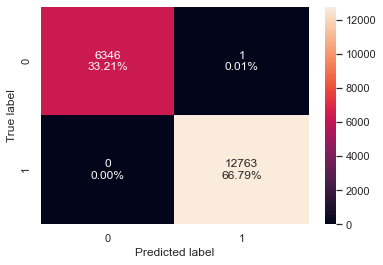

In [308]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train) # create confusion matrix for train data

In [309]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) # check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999948,1.0,0.999922,0.999961


#### Checking model performance on test set

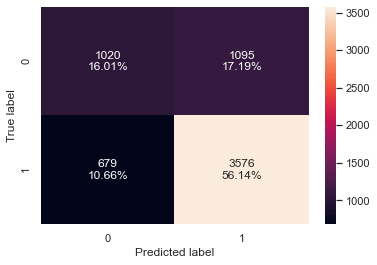

In [310]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) # create confusion matrix for test data

In [311]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) # check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.721507,0.840423,0.765575,0.801255


* Both models - Bagging and random forest classifiers are overfitting the train data.
* Both models are also very good at predicting visa-certified employees.
* Bagging classifier is better at identifying denied employees than random forest classifier.
* Random forest classifier gives better accuracy, recall, and F1, except for Precision, compared to bagging classifier.

### AdaBoost Classifier

In [312]:
ab_classifier = AdaBoostClassifier(random_state=1) # define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train, y_train) # fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

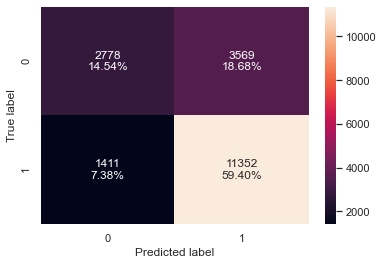

In [313]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train) # create confusion matrix for train data

In [314]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.739403,0.889446,0.760807,0.820113


#### Checking model performance on test set

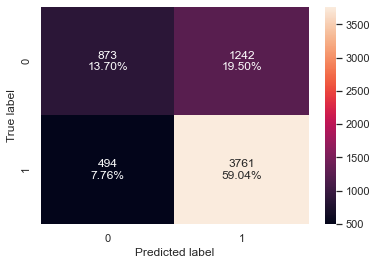

In [315]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test) # create confusion matrix for test data

In [316]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test) # check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727473,0.883901,0.751749,0.812486


**With default parameters:**
* Adaboost is giving a more generalized performance than previous models.


### Gradient Boosting Classifier

In [317]:
gb_classifier = GradientBoostingClassifier(random_state=1) # define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train, y_train) # fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

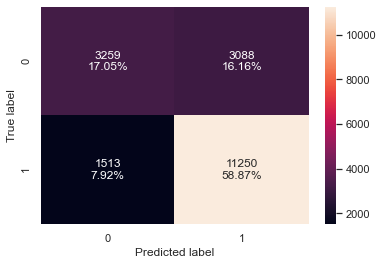

In [318]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train) # create confusion matrix for train data

In [319]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train) # check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759236,0.881454,0.784628,0.830228


#### Checking model performance on test set

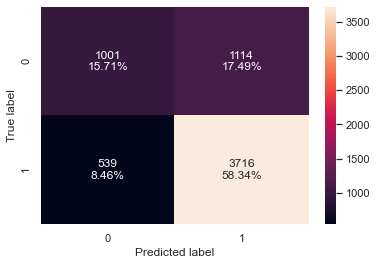

In [320]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)  # create confusion matrix for test data

In [321]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test) # check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740502,0.873325,0.769358,0.818052


* The gradient boosting classifier is not overfitting and generalized on training and testing sets.

### XGBoost Classifier

In [322]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss') # define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train, y_train) # fit XGBoost Classifier on the train data

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

#### Checking model performance on training set

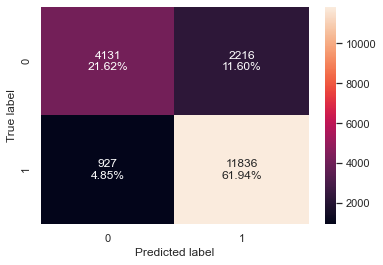

In [323]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train) # create confusion matrix for train data

In [324]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train) # check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.835531,0.927368,0.8423,0.882789


#### Checking model performance on test set

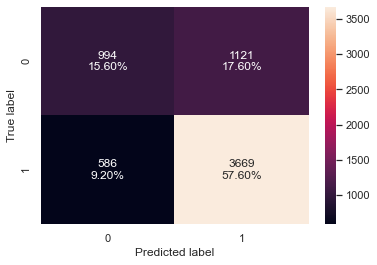

In [325]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test) # create confusion matrix for test data

In [326]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test) # check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732025,0.86228,0.765971,0.811277


* xgboost classifier is not overfitting the training data.

### Stacking Classifier

In [327]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator) # define Stacking Classifier

stacking_classifier.fit(X_train, y_train) # fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       oob_score=T...
                                                 

#### Checking model performance on training set

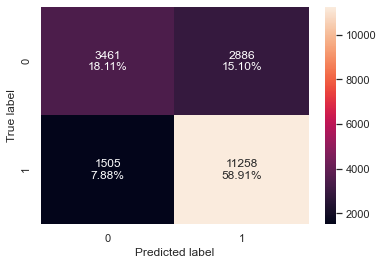

In [328]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train) # create confusion matrix for train data

In [329]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train) # check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.770225,0.882081,0.795956,0.836808


#### Checking model performance on test set

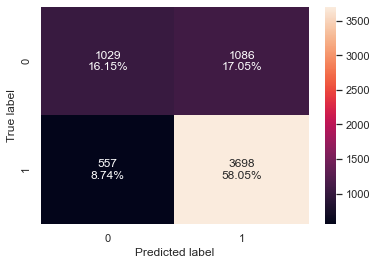

In [330]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test) # create confusion matrix for test data

In [331]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test) # check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742072,0.869095,0.772993,0.818232


* The stacking classifier has slightly lower performance as compared to XGBoost.
* The stacking is not overfitting the training data.

##  Will tuning the hyperparameters improve the model performance?

### Hyperparameter Tuning - Bagging Classifier

In [332]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5) # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=110,
                  random_state=1)

#### Checking model performance on training set

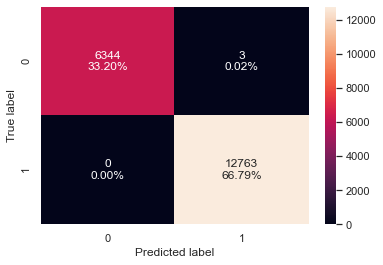

In [333]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_train, y_train
)   # create confusion matrix for train data on tuned estimator

In [334]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) # check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999843,1.0,0.999765,0.999882


#### Checking model performance on test set

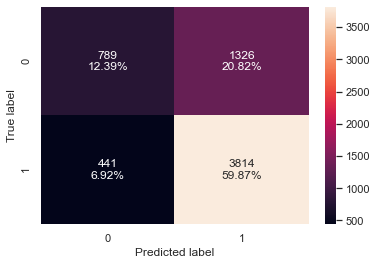

In [335]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_test, y_test
) # create confusion matrix for test data on tuned estimator

In [336]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) # check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.722606,0.896357,0.742023,0.811921


### Insight
* We can see that training accuracy and recall for the bagging classifier have increased slightly after hyperparameter tuning.
* The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and recall.
* The confusion matrix shows that the model is better at identifying 'Visa Certified' than 'Visa Denied.'

### Hyperparameter Tuning - Random Forest

In [337]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=25, oob_score=True, random_state=1)

#### Checking model performance on training set

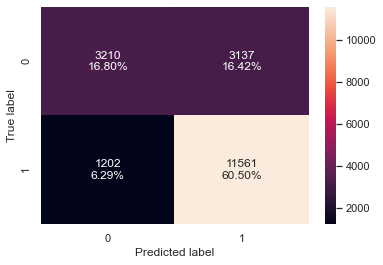

In [338]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [339]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) # check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.772946,0.905822,0.78657,0.841994


#### Checking model performance on test set

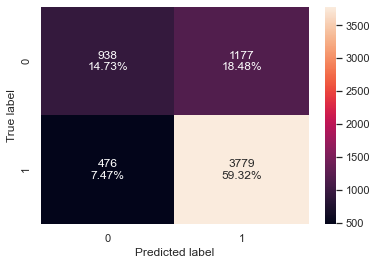

In [340]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [341]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) # check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740502,0.888132,0.76251,0.820541


### Insight
* We can see that random forest's train performance has decreased and test performance has increased compared to the random forest model with default parameters.
* Model is not overfitting, and we have a generalized model.
* The test recall is high, meaning that the model is good at identifying visa-certified employees.

### Hyperparameter Tuning - AdaBoost Classifier

In [342]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5) # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

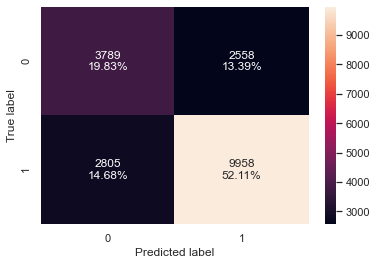

In [343]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [344]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) # check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719362,0.780224,0.795622,0.787848


#### Checking model performance on test set

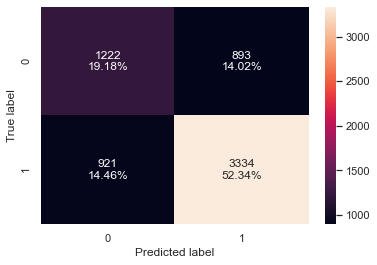

In [345]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [346]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test) # check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.715228,0.783549,0.788739,0.786135


### Insights
* The model performance has slightly decreased after hyperparameter tuning, except for precision.

### Hyperparameter Tuning - Gradient Boosting Classifier

In [347]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5) # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

#### Checking model performance on training set

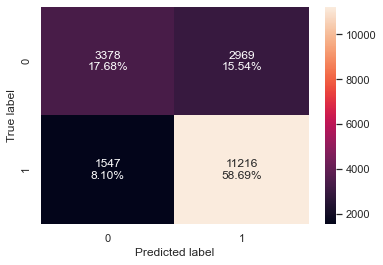

In [348]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)  # create confusion matrix for train data on tuned estimator

In [349]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train) # check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.763684,0.87879,0.790694,0.832418


#### Checking model performance on test set

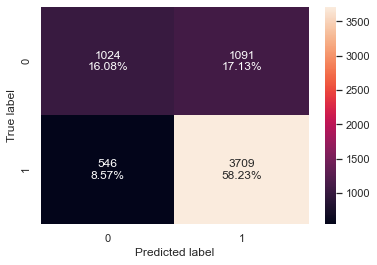

In [350]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)   # create confusion matrix for test data on tuned estimator

In [351]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test) # check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743014,0.87168,0.772708,0.819216


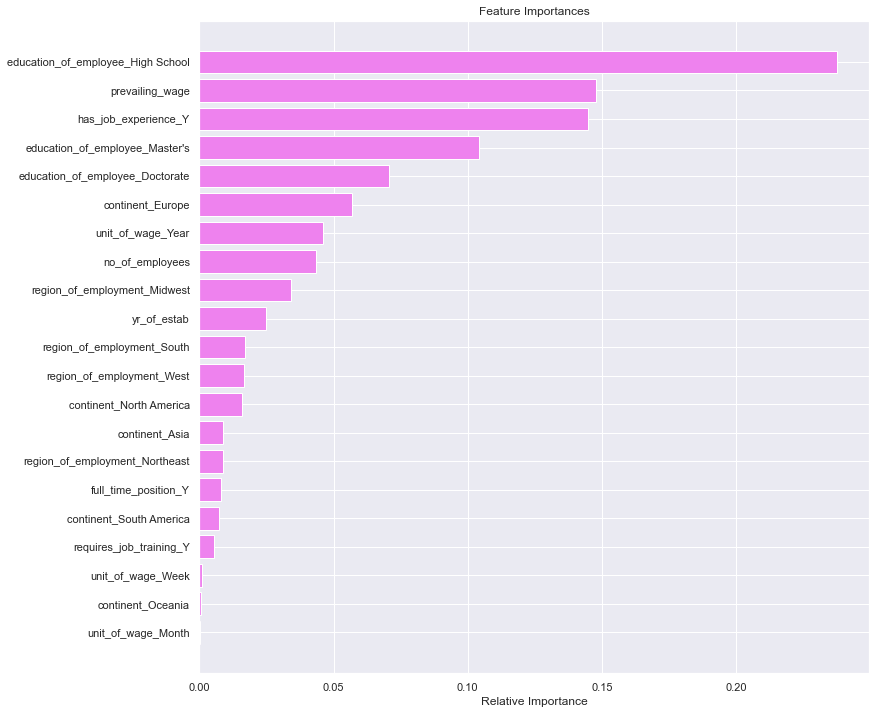

In [382]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
* There is not much difference in the model performance after hyperparameter tuning.

### Hyperparameter Tuning - XGBoost Classifier

In [352]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)  # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

#### Checking model performance on training set

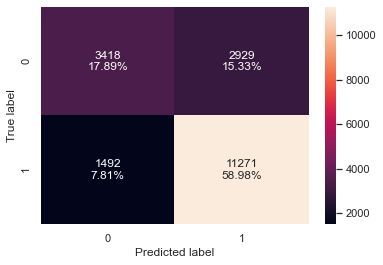

In [353]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [354]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) # check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.768655,0.8831,0.793732,0.836035


#### Checking model performance on test set

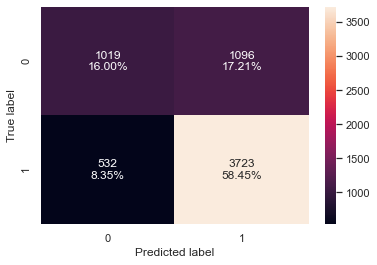

In [355]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [356]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) # check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744427,0.874971,0.772567,0.820586


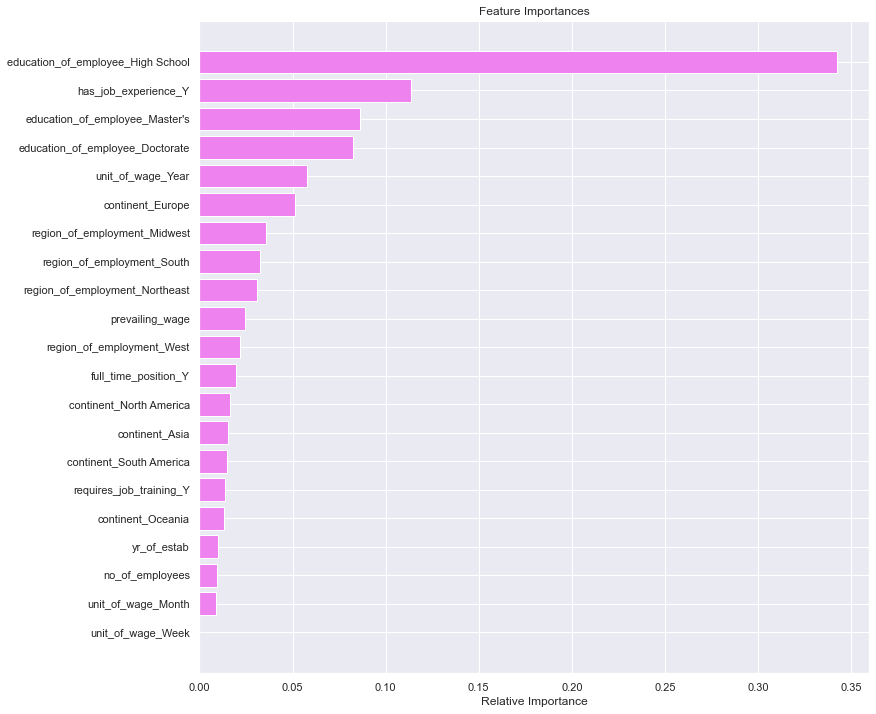

In [383]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
* The model performance has slightly decreased on the training set but increased on the testing set.
* The model is not overfitting after hyperparameter tuning.

## Model Performance Comparison and Conclusions

**Comparing all models**

In [357]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.985139,0.999843,0.999948,0.772946,0.739403,0.719362,0.759236,0.763684,0.835531,0.768655,0.770225
Recall,1.0,1.0,0.984486,1.000000,1.000000,0.905822,0.889446,0.780224,0.881454,0.878790,0.927368,0.883100,0.882081
Precision,1.0,1.0,0.993202,0.999765,0.999922,0.786570,0.760807,0.795622,0.784628,0.790694,0.842300,0.793732,0.795956
F1,1.0,1.0,0.988825,0.999882,0.999961,0.841994,0.820113,0.787848,0.830228,0.832418,0.882789,0.836035,0.836808


In [358]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
        ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652433,0.707064,0.696860,0.722606,0.721507,0.740502,0.727473,0.715228,0.740502,0.743014,0.732025,0.744427,0.742072
Recall,0.736780,0.931610,0.774618,0.896357,0.840423,0.888132,0.883901,0.783549,0.873325,0.871680,0.862280,0.874971,0.869095
Precision,0.741310,0.715653,0.772259,0.742023,0.765575,0.762510,0.751749,0.788739,0.769358,0.772708,0.765971,0.772567,0.772993
F1,0.739038,0.809475,0.773437,0.811921,0.801255,0.820541,0.812486,0.786135,0.818052,0.819216,0.811277,0.820586,0.818232


### Insights
* Decision Tree, Bagging classifiers, and Random Forest classifier are overfitting the training data.
* All boosting models are not overfitting the training data and give a more generalized performance. 

* After hyperparameter tuning, Random forest is not overfitting the training data. However, the Decision tree and Bagging classifier are still overfitting. 
* Adaboost classifier and XGBoost classifier's performances have slightly decreased after hyperparameter tuning. Gradient Boosting classifier has a similar performance.
* Stacking classifier is not overfitting.

In [372]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [373]:
df.education_of_employee.unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [371]:
X_train.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
19474,414,2004,18546.12,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1
137,2847,2013,77883.22,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
3754,1429,2008,139111.82,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1
4431,890,1978,101561.38,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1
7707,2348,1997,97817.75,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1


### Important features of the final model- Random Forest Tuned

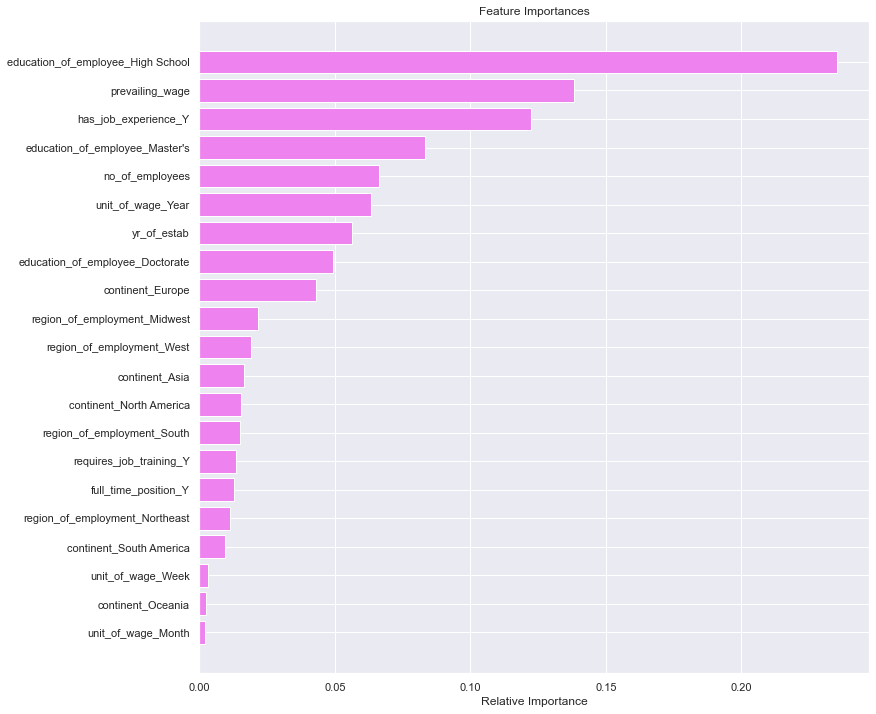

In [385]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

We analyzed a dataset of visa applications provided by OFLC. The dataset contains 25,480 applications and 11 attributes. The main objective is to analyze the dataset and recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

Based on our analysis, we can identify that:
* The education, prevailing wage, and job experience are the most critical factors in identifying the workers who should be certified. Once the model achieves the desired performance, OFLC can use it to predict if an applicant should be certified, which would help to reduce the cost and increase the efficiency of the process.
* Education: Education is a critical factor in almost all models. Bachelor's and Master's degrees account for 78% of the dataset. And around 62% of the applicants with Bachelor's degrees and 78% of the applicants with Master's degrees are certified. The model is good at identifying those who should be certified. Therefore, OFLC can focus on education as a first layer. 
* Prevailing Wage: Employers have to demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area. Therefore, it is not surprising to see prevailing wage affects the certification result. The certified workers did have a higher prevailing wage than denied workers.
* Job experience: the applicants who have job experience are the ones who benefit the companies more and hurt the local workers less. Those foreign workers don't need too much training and are hard to find from the local workforce.
* Pay unit is also an essential factor. Yearly pay unit is around 70% to get a certified visa, followed by Weekly and Monthly, approximately 62%. The hourly pay unit is most likely to be denied. OFLC can focus on those applicants who get yearly pay unit.

The applicants with higher education, prevailing wage, job experience, and yearly pay are great candidates to fill workforce shortages and meet the US employers' compliance.